TrainData Dimensions: X: (699, 1) Y: (699, 1) 
TestData Dimensions: X: (300, 1) Y: (300, 1) 

Iteration: 1, Loss: 2945.3961224079467


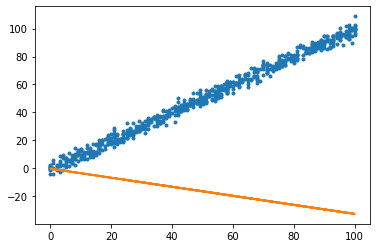

Iteration: 2, Loss: 1308.8950251507913


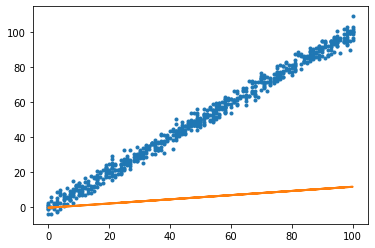

Iteration: 3, Loss: 582.8728604042155


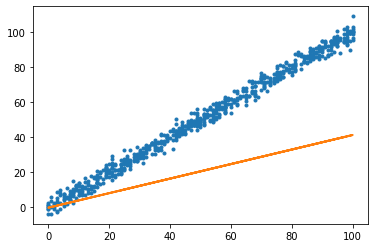

Iteration: 4, Loss: 260.7782497215883


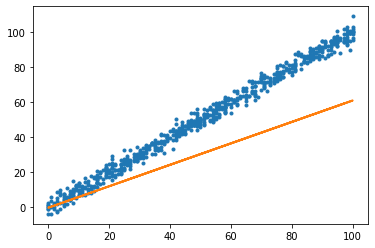

Iteration: 5, Loss: 117.88324828438554


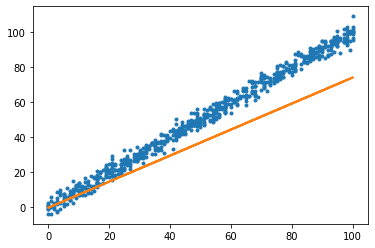

Iteration: 6, Loss: 54.488889055488315


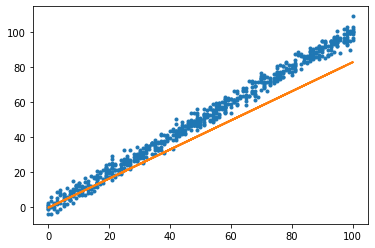

Iteration: 7, Loss: 26.36442878534101


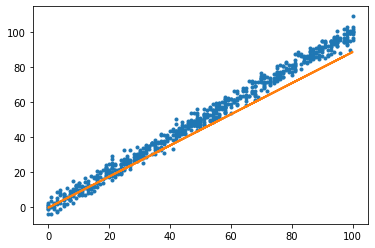

Iteration: 8, Loss: 13.887210323646801


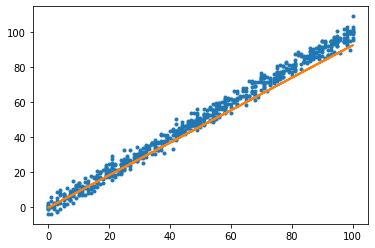

Iteration: 9, Loss: 8.351780283253632


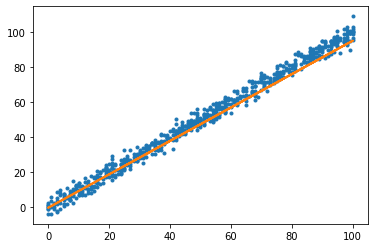

Iteration: 10, Loss: 5.8960256946787215


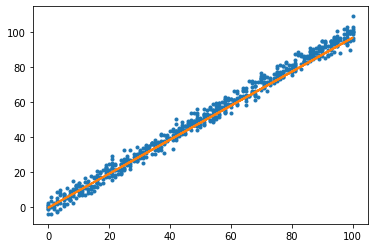

Iteration: 11, Loss: 4.806547390101454


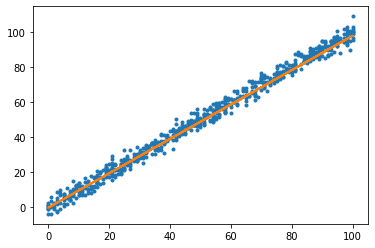

Iteration: 12, Loss: 4.323207918472221


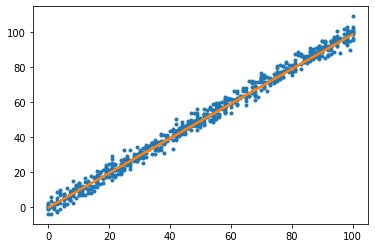

Iteration: 13, Loss: 4.108777663166896


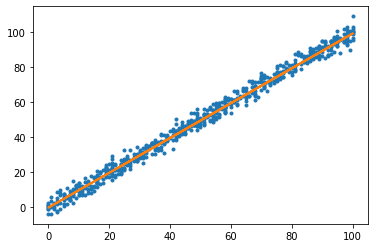

Iteration: 14, Loss: 4.013647084264235


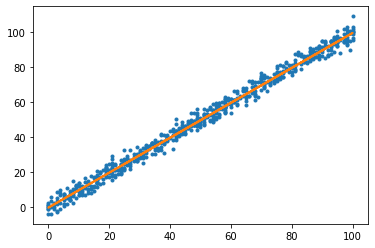

Iteration: 15, Loss: 3.971442965023915


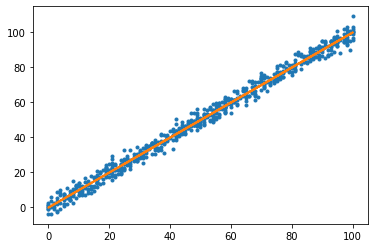

Iteration: 16, Loss: 3.9527192961688717


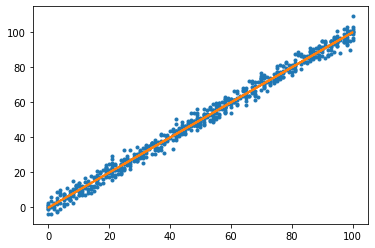

Iteration: 17, Loss: 3.94441256345454


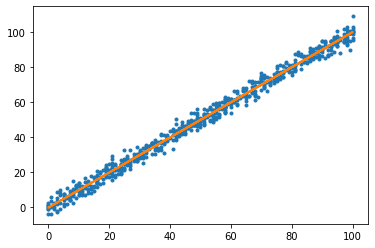

Iteration: 18, Loss: 3.9407272309625516


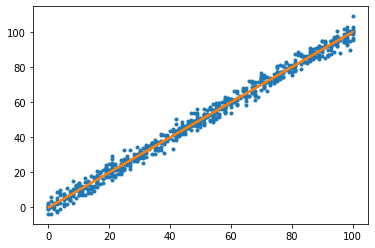

Iteration: 19, Loss: 3.93909215007605


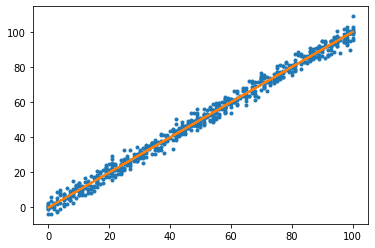

Iteration: 20, Loss: 3.938366648853207


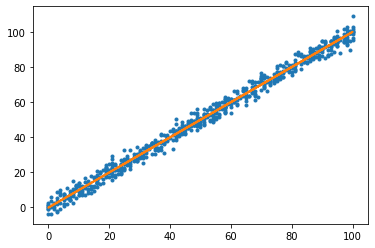

Model performance on test data 
Cost: 4.716611153485587


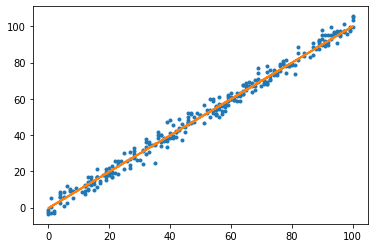

In [4]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Download the dataset from Kaggle
#https://www.kaggle.com/andonians/random-linear-regression/data
train_path = r'C:\Users\User\Downloads\archive\train.csv'
test_path = r'C:\Users\User\Downloads\archive\test.csv'

#Read the dataset
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

#Clean dataset for null values(if any)
train = train.dropna()

#Set Hyperparameter values
iterations = 20
learning_rate = 0.0001

#Store data and labels separately
train_data = np.array(train.x).reshape(train.shape[0], 1)
train_labels = np.array(train.y).reshape(train.shape[0], 1)

test_data = np.array(test.x).reshape(test.shape[0], 1)
test_labels = np.array(test.y).reshape(test.shape[0], 1)

print("TrainData Dimensions: X: {} Y: {} \nTestData Dimensions: X: {} Y: {} \n"
      .format(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape))

#Random initializations
weight = np.random.uniform(0, 1) * -1
bias = np.random.uniform(0, 1) * -1
plt.figure()

#Training
for iteration in range(iterations):
    
    #Forward propagation
    predictions = np.multiply(weight, train_data) + bias
    
    #CostFunction(MSE: Mean Squared Error)
    cost = np.mean((train_labels - predictions) ** 2) * 0.5
    print("Iteration: {}, Loss: {}".format(iteration+1, cost))
    
    #Plot the current status
    plt.plot(train_data, train_labels, '.')
    plt.plot(train_data, predictions, linewidth=2)
    plt.show()
    
    #Gradient Descent for back propagation
    cost_derivative = (train_labels - predictions) * -1
    derivative_wrt_weight = np.mean(np.multiply(train_data, cost_derivative))
    derivative_wrt_bias = np.mean(cost_derivative)
    
    #Update weight & bias parameters
    weight = weight - learning_rate * derivative_wrt_weight
    bias = bias - learning_rate * derivative_wrt_bias

#Testing
test_predictions = test_data * weight + bias
cost_test = np.mean((test_labels - test_predictions) ** 2) * 0.5
print("Model performance on test data \nCost: {}".format(cost_test))

plt.figure()
plt.plot(test_data, test_labels, '.')
plt.plot(test_data, test_predictions, linewidth=2)
plt.show()